In [181]:
from skimage.io import imread, imshow
mm_stack = imread('/home/jiongyi/Documents/gianin564_CIMPR647_4_MMStack.ome.tif')

membrane_im = mm_stack[1, :, :]
dapi_im = mm_stack[3, :, :]

/home/jiongyi/anaconda3/lib/python3.6/site-packages/skimage/external/tifffile/tifffile.py:1820: UserWarning: ome-xml: failed to read 'gianin564 CIMPR647_4_MMStack.ome.tif'
  "ome-xml: failed to read '%s'" % fname)


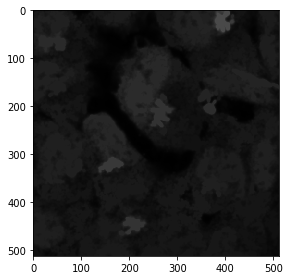

In [182]:
from skimage.exposure import equalize_adapthist, rescale_intensity
from skimage.morphology import dilation, erosion, reconstruction, disk
from skimage.filters import threshold_yen, gaussian, try_all_threshold
from skimage.util import invert

# Segment nuclei.
bw_dapi_im = dapi_im > threshold_otsu(dapi_im)

# Segment membrane.
rescaled_membrane_im = gaussian(rescale_intensity(membrane_im), sigma = 1)
eroded_membrane_im = erosion(rescaled_membrane_im, disk(10))
opened_membrane_im = reconstruction(eroded_membrane_im, rescaled_membrane_im)

dilated_membrane_im = dilation(opened_membrane_im, disk(3))
closed_membrane_im = invert(reconstruction(invert(dilated_membrane_im), invert(opened_membrane_im)))

bw_membrane_im = closed_membrane_im > threshold_yen(closed_membrane_im)
%matplotlib inline
imshow(opened_membrane_im)

/home/jiongyi/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:75: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


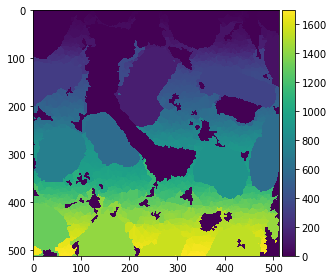

In [183]:
from skimage.morphology import watershed
from numpy import copy
copied_im = copy(opened_membrane_im)
copied_im[bw_dapi_im] = 0
imshow(watershed(copied_im, mask = bw_membrane_im))

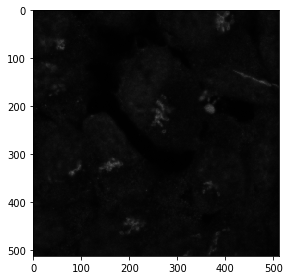

In [184]:
imshow(membrane_im)

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


(<Figure size 576x360 with 8 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f02c10811d0>,
       dtype=object))

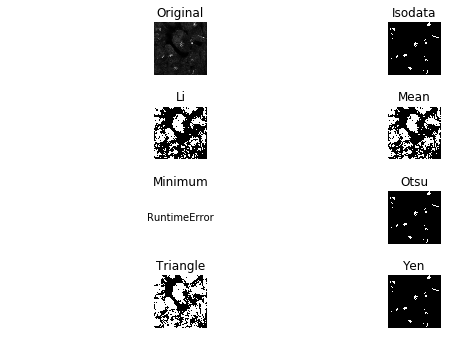

In [185]:
try_all_threshold(rescale_intensity(mm_stack[1, :, :]))